# Project 2: Movie Review Sentiment Analysis

In [1]:
from sklearn.model_selection import train_test_split
from scipy.sparse import load_npz

## Importing Features

In [2]:
# Import our features and their features here
their_data = load_npz('../data/origfeat.npz')

In [3]:
their_y = their_data[:, 0].toarray()

In [4]:
their_features = their_data[:, 1:]

## Dimensionality Reduction

In [5]:
from sklearn.decomposition import TruncatedSVD

In [35]:
#our_pca = PCA(n_components = 3)
their_pca = TruncatedSVD(n_components = 250)

#our_reduced_features = our_pca.fit_transform(our_features)
their_reduced_features = their_pca.fit_transform(their_features)

## Building models

In [36]:
from linear_models.lda import LDAClassifier
from linear_models.SGD import SGDClassifier

In [37]:
our_lda = LDAClassifier()
their_lda = LDAClassifier()

our_svm = SGDClassifier()
their_svm = SGDClassifier(epsilon=1e-3, fit_intercept=True)

our_log = SGDClassifier(loss='log')
their_log = SGDClassifier(loss='log', num_workers=4)

In [38]:
# of_train, of_test, oy_train, oy_test = train_test_split(
#     our_reduced_features, 
#     our_y, 
#     test_size=0.33,
#     random_state=42)

tf_train, tf_test, ty_train, ty_test = train_test_split(
    their_reduced_features,
    their_y,
    test_size=0.33,
    random_state=42)

In [39]:
#our_lda.fit(of_train, oy_train)
their_lda.fit(tf_train, ty_train)

#our_svm.fit(of_train, oy_train)
#their_svm.fit(tf_train, ty_train)

#our_log.fit(of_train, oy_train)
#their_log.fit(tf_train, ty_train)

In [18]:
import numpy as np

In [64]:
import matplotlib.pyplot as plt

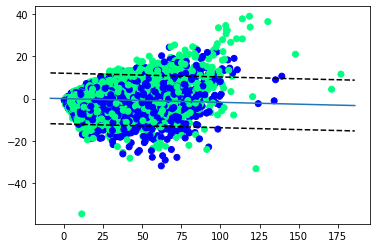

In [65]:
def decision_boundary(model, c, x):
    w0 = model.coef_.flatten()[0]
    w1 = model.coef_.flatten()[1]

    return -w0/w1 * x - (model.intercept_ + c) / w1

ax = plt.gca()
plt.scatter(tf_train[:, 0], tf_train[:, 1], c=ty_train.T[0], cmap='winter')
xlim = ax.get_xlim()
w0 = their_svm.coef_[0]
w1 = their_svm.coef_[1]
a = -w0 / w1
xx = np.linspace(xlim[0], xlim[1])
yy = decision_boundary(their_svm, 0, xx)
plt.plot(xx, yy)
yy = decision_boundary(their_svm, 1, xx)
plt.plot(xx, yy, 'k--')
yy = decision_boundary(their_svm, -1, xx)
plt.plot(xx, yy, 'k--')

In [16]:
from sklearn.linear_model import SGDClassifier as skSGD

In [17]:
sk = skSGD(learning_rate='constant', eta0=their_svm.epsilon, verbose = 3)

In [18]:
import numpy as np

In [19]:
sk.fit(tf_train, np.asarray(ty_train).flatten())

-- Epoch 1
Norm: 0.11, NNZs: 2, Bias: 0.016000, T: 16750, Avg. loss: 1.088659
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 2, Bias: 0.057000, T: 33500, Avg. loss: 1.097257
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.12, NNZs: 2, Bias: 0.043000, T: 50250, Avg. loss: 1.086465
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.15, NNZs: 2, Bias: 0.076000, T: 67000, Avg. loss: 1.097262
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.09, NNZs: 2, Bias: 0.103000, T: 83750, Avg. loss: 1.083557
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.12, NNZs: 2, Bias: 0.114000, T: 100500, Avg. loss: 1.087828
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.20, NNZs: 2, Bias: 0.070000, T: 117250, Avg. loss: 1.095459
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.10, NNZs: 2, Bias: 0.091000, T: 134000, Avg. loss: 1.092850
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.14, NNZs: 2, Bias: 0.110000, T: 150750, Avg. loss: 1.091360
Total training

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=3, warm_start=False)

In [57]:
sk.score(tf_test, ty_test)

0.8263030303030303

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [59]:
lda = LinearDiscriminantAnalysis()

In [66]:
lda.fit(tf_train, ty_train.T.flatten())

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [67]:
lda.score(tf_test, ty_test)

0.8265454545454546

In [68]:
lda.intercept_

array([0.01715381])

In [69]:
lda.coef_

array([[ 0.00275713,  0.08182821, -0.09312084,  0.04001707,  0.11849634,
        -0.09678586, -0.05626116,  0.0161071 , -0.06772889, -0.17349263,
        -0.01067015,  0.03950796, -0.13627327, -0.08311562, -0.11699981,
        -0.15801804, -0.06528342, -0.21272321,  0.2385235 ,  0.24430093,
         0.10487018, -0.06892988, -0.1372553 , -0.13394242,  0.04682452,
        -0.11622105, -0.16837108,  0.07868458,  0.32049976,  0.03105388,
        -0.23509073, -0.33846092,  0.0490027 ,  0.20038224, -0.51032312,
        -0.15728053,  0.06888322, -0.23018617,  0.11157304,  0.15376406,
         0.06615195, -0.37516856, -0.01326495,  0.09280884, -0.09491315,
         0.02039898, -0.223665  ,  0.11373996,  0.24828439, -0.38814662,
        -0.02161508, -0.17045283,  0.21238175, -0.03920569, -0.14608377,
         0.0618224 ,  0.58191052, -0.0343165 , -0.08633534, -0.24725126,
         0.07203356,  0.10222503, -0.11696163, -0.1559252 , -0.10040855,
         0.2571531 , -0.19702518, -0.34869151,  0.0

In [73]:
print(their_lda)

Linear Regression Model
Coefficients: 
None
Intercept: None



In [60]:
sk = skSGD(learning_rate='constant', eta0=1e-4, loss='log')

In [61]:
sk.fit(tf_train, ty_train.T.flatten())

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=None, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
sk.score(tf_test, ty_test)

0.8256969696969697

In [63]:
their_svm.score(tf_test, ty_test)

AttributeError: 'SGDClassifier' object has no attribute 'classes'

In [29]:
their_svm.intercept_

In [30]:
their_svm.coef_

In [31]:
sk.intercept_

array([0.03649191])

In [32]:
sk.coef_

array([[0.01479387, 0.05212444]])

## Cross Validation

In [15]:
from cross_validation.cross_validation import cross_validate, get_confusion_matrix

In [16]:
our_lda_metrics = cross_validate(
    model=our_lda,
    x=our_features,
    y=our_y,
    metrics=[our_lda.score, get_confusion_matrix])

NameError: name 'our_features' is not defined

In [ ]:
their_lda_metrics = cross_validate(
    model=their_lda,
    x=their_features,
    y=their_y,
    metrics=[their_lda.score, get_confusion_matrix])

In [ ]:
our_svm_metrics = cross_validate(
    model=our_svm,
    x=our_features,
    y=our_y,
    metrics=[our_svm.score, get_confusion_matrix])

In [ ]:
their_svm_metrics = cross_validate(
    model=their_svm,
    x=their_features,
    y=their_y,
    metrics=[their_svm.score, get_confusion_matrix])

In [ ]:
our_log_metrics = cross_validate(
    model=our_log,
    x=our_features,
    y=our_y,
    metrics=[our_log.score, get_confusion_matrix])

In [ ]:
their_log_metrics = cross_validate(
    model=their_log,
    x=their_features,
    y=their_y,
    metrics=[their_log.score, get_confusion_matrix])

## Aggregation of Metrics

In [ ]:
our_lda_score = np.mean(our_lda_metrics[:, 0])
our_lda_confusion = np.sum(our_lda_metrics[:, 1])
their_lda_score = np.mean(their_lda_metrics[:, 0])
their_lda_confusion = np.sum(their_lda_metrics[:, 1])
print('================================')
print('* LDA Cross Validation Metrics *')
print('================================')
print(f'Accuracy w/ our Features: {our_lda_score}')
print(f'Accuracy w/ their Features: {their_lda_score}')
print(f'Confusion Matrix w/ our Features:\n{our_lda_confusion}')
print(f'Confusion Matrix w/ their Features:\n{their_lda_confusion}')

In [ ]:
our_svm_score = np.mean(our_svm_metrics[:, 0])
our_svm_confusion = np.sum(our_svm_metrics[:, 1])
their_svm_score = np.mean(their_svm_metrics[:, 0])
their_svm_confusion = np.sum(their_svm_metrics[:, 1])
print('================================')
print('* SVM Cross Validation Metrics *')
print('================================')
print(f'Accuracy w/ our Features: {our_svm_score}')
print(f'Accuracy w/ their Features: {their_svm_score}')
print(f'Confusion Matrix w/ our Features:\n{our_svm_confusion}')
print(f'Confusion Matrix w/ their Features:\n{their_svm_confusion}')

In [ ]:
our_log_score = np.mean(our_log_metrics[:, 0])
our_log_confusion = np.sum(our_log_metrics[:, 1])
their_log_score = np.mean(their_log_metrics[:, 0])
their_log_confusion = np.sum(their_log_metrics[:, 1])
print('================================')
print('* LDA Cross Validation Metrics *')
print('================================')
print(f'Accuracy w/ our Features: {our_log_score}')
print(f'Accuracy w/ their Features: {their_log_score}')
print(f'Confusion Matrix w/ our Features:\n{our_log_confusion}')
print(f'Confusion Matrix w/ their Features:\n{their_log_confusion}')